In [1]:
import numpy as np
import scipy as scipy
import math as math
from scipy.optimize import root
import matplotlib.pyplot as plt

In [42]:


def crank_nicolson(g: callable,a: callable, b: callable, x0: float, x_m: float, t0: float, t_m: float, N_x: int, N_t: int,req_time_step: int,iflist=True,k=1):
    '''
    # Crank Nicolson Method
    for solving the heat equation of the form u_xx = k*u_t
    ## Parameters
    - g: Initial condition function u(x,t=0) = g(x)
    - a: Boundary condition function u(x=0,t) = a(t)
    - b: Boundary condition function u(x=x_m,t) = b(t)
    - x0: Initial value of x
    - x_m: Final value of x
    - t0: Initial value of t
    - t_m: Final value of t
    - N_x: Number of steps to divide the interval [x0,x_m]
    - N_t: Number of steps to divide the interval [t0,t_m]
    - req_time_step: The time step to which the solution is to be calculated
    - iflist: If True, the function will return the list of u values, if False, the function will return u as a column matrix or a vector
    - k: The thermal diffusivity
    ## Returns
    - x: List of x values
    - t: List of t values
    - u: List of List of u values or vector depending on the value of iflist
    '''
    hx = (x_m - x0) / N_x
    ht = (t_m - t0) / N_t
    x=[x0 + i*hx for i in range(1,N_x)]
    alpha = (ht / (hx**2))/k  
    u = [[g(i)] for i in x]
    B = [[0 for i in range(N_x-1)] for j in range(N_x-1)]    
    I = [[0 for i in range(N_x-1)] for j in range(N_x-1)]   
    for i in range(len(B)):
        for j in range(len(B[i])):
            if i==j:
                B[i][j]=2*alpha
                I[i][j]=2
            elif abs(i-j)==1:
                B[i][j]=-1*alpha

    matrix1=[[I[i][j]-B[i][j] for j in range(N_x-1)] for i in range(N_x-1)]
    matrix2=[[I[i][j]+B[i][j] for j in range(N_x-1)] for i in range(N_x-1)] 
    #matrix21=Get_Gauss_jordan_inv(matrix2)
    matrix21 = np.linalg.inv(matrix2)
    del matrix2
    matrix3=np.matmul(matrix21,matrix1)     
    del matrix1,matrix21
    matrix4=np.linalg.matrix_power(matrix3,req_time_step)
    del matrix3
    v_req = np.matmul(matrix4,u).tolist()
    del matrix4
    v_req.insert(0,[a(t0)])
    v_req.append([b(t0)])
    x.insert(0,x0)
    x.append(x_m)
    ulist=[]
    if iflist==False:
        return x,v_req,[t0 + i*ht for i in range(N_t+1)]
    else:
        for i in range(len(v_req)):
            ulist.append(v_req[i][0])        
        return x,ulist,[t0 + i*ht for i in range(req_time_step+1)]
    


[0.7853981633917327, 0.785398163391562, 0.7853981633910402, 0.7853981633901387, 0.7853981633888082, 0.7853981633869762, 0.7853981633845439, 0.7853981633813806, 0.7853981633773177, 0.7853981633721409, 0.7853981633655792, 0.7853981633572927, 0.7853981633468565, 0.7853981633337409, 0.7853981633172872, 0.7853981632966782, 0.785398163270901, 0.7853981632387027, 0.7853981631985358, 0.7853981631484916, 0.7853981630862177, 0.7853981630088206, 0.7853981629127451, 0.7853981627936285, 0.7853981626461235, 0.7853981624636854, 0.7853981622383139, 0.7853981619602424, 0.7853981616175612, 0.7853981611957684, 0.7853981606772271, 0.7853981600405149, 0.7853981592596455, 0.7853981583031365, 0.7853981571328954, 0.7853981557028917, 0.7853981539575744, 0.7853981518299878, 0.7853981492395354, 0.7853981460893255, 0.7853981422630264, 0.7853981376211471, 0.7853981319966417, 0.7853981251897264, 0.7853981169617719, 0.7853981070281195, 0.7853980950496438, 0.7853980806228542, 0.785398063268304, 0.7853980424170313, 0.

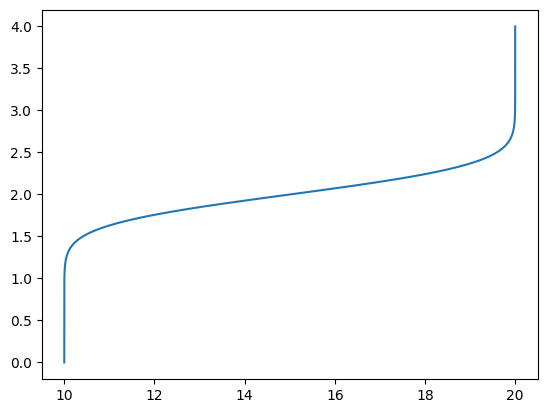

In [14]:
Tu=10
Tl=20
Lc=4
Lu=0
lamda=2
c=4174000
#c=2104000
t=86400
l=0.01
Nz=int((Lc-Lu)/l)
z = np.linspace(Lu, Lc, Nz+1)
import numpy as np

start = 1
end = 10000

def expression(n,z,t):
    return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/Lc)*np.exp(-(((2*n-1)*np.pi/Lc)**2)*lamda/c*t)


# Define a function to compute the value of each term

def sumfn(expression):
    sol=[]
    for i,val in enumerate(z):
        result = np.sum(expression(np.arange(start, end+1),val,t))
        sol.append(result)
    print(sol)
    sol1=np.array(sol)
    ans=(((sol1*2/np.pi)+0.5)*Tu)+((0.5-(sol1*2/np.pi))*Tl)
    return ans
   

    
ans=sumfn(expression)
#print(ans)

plt.plot(ans,z)    


# Compute the sum using numpy.sum() with a vectorized version of the function
# start = 1
# end = 100
# sol=[]
# for i,val in enumerate(z):
#     result = np.sum(expression(np.arange(start, end+1),val,t))
#     sol.append(result)
# print(sol)




In [43]:
# import numpy as np
# import scipy as scipy
# import math as math
# from scipy.optimize import root
# import matplotlib.pyplot as plt

# def crank_nicolson(g: callable,a: callable, b: callable, x0: float, x_m: float, t0: float, t_m: float, N_x: int, N_t: int,req_time_step: int,iflist=True,k=1):
#     '''
#     # Crank Nicolson Method
#     for solving the heat equation of the form u_xx = k*u_t
#     ## Parameters
#     - g: Initial condition function u(x,t=0) = g(x)
#     - a: Boundary condition function u(x=0,t) = a(t)
#     - b: Boundary condition function u(x=x_m,t) = b(t)
#     - x0: Initial value of x
#     - x_m: Final value of x
#     - t0: Initial value of t
#     - t_m: Final value of t
#     - N_x: Number of steps to divide the interval [x0,x_m]
#     - N_t: Number of steps to divide the interval [t0,t_m]
#     - req_time_step: The time step to which the solution is to be calculated
#     - iflist: If True, the function will return the list of u values, if False, the function will return u as a column matrix or a vector
#     - k: The thermal diffusivity
#     ## Returns
#     - x: List of x values
#     - t: List of t values
#     - u: List of List of u values or vector depending on the value of iflist
#     '''
#     hx = (x_m - x0) / N_x
#     ht = (t_m - t0) / N_t
#     x=[x0 + i*hx for i in range(0,N_x)]
#     alpha = (ht / (hx**2))/k  
#     u = [[g(i)] for i in x]
#     B = [[0 for i in range(N_x)] for j in range(N_x)]    
#     I = [[0 for i in range(N_x)] for j in range(N_x)]   
#     for i in range(len(B)):
#         for j in range(len(B[i])):
#             if i==j:
#                 B[i][j]=2*alpha
#                 I[i][j]=2
#             elif abs(i-j)==1:
#                 B[i][j]=-1*alpha

#     matrix1=[[I[i][j]-B[i][j] for j in range(N_x)] for i in range(N_x)]
#     matrix2=[[I[i][j]+B[i][j] for j in range(N_x)] for i in range(N_x)] 
#     #matrix21=Get_Gauss_jordan_inv(matrix2)
#     matrix21 = np.linalg.inv(matrix2)
#     del matrix2
#     matrix3=np.matmul(matrix21,matrix1)     
#     del matrix1,matrix21
#     matrix4=np.linalg.matrix_power(matrix3,req_time_step)
#     del matrix3
#     v_req = np.matmul(matrix4,u).tolist()
#     del matrix4
#     v_req.insert(0,[a(t0)])
#     v_req.append([b(t0)])
#     x.insert(0,x0)
#     x.append(x_m)
#     ulist=[]
#     if iflist==False:
#         return x,v_req,[t0 + i*ht for i in range(N_t+1)]
#     else:
#         for i in range(len(v_req)):
#             ulist.append(v_req[i][0])        
#         return x,ulist,[t0 + i*ht for i in range(req_time_step+1)]
    


In [44]:
# def plot_crank_nicolson(g, a, b, x0, x_m, t0, t_m, N_x, N_t, time_points):
    
#     for time_point in time_points:
#         x_values, B_values, time_values = crank_nicolson(g, a, b, x0, x_m, t0, t_m, N_x, N_t, time_point)
#         plt.plot(B_values[50:150],x_values[50:150],  label="t = " + str(round(time_values[time_point], 2)))
#         del x_values, B_values, time_values

#     plt.legend()
#     plt.xlabel("Position (x)")
#     plt.ylabel("B_phi")
#     plt.grid()
#     plt.show()


def plot_crank_nicolson(g, a, b, x0, x_m, t0, t_m, N_x, N_t, time_points):
    
    for time_point in time_points:
        x_values, B_values, time_values = crank_nicolson(g, a, b, x0, x_m, t0, t_m, N_x, N_t, time_point)
        plt.plot(x_values,B_values,  label="t = " + str(round(time_values[time_point], 2)))
        del x_values, B_values, time_values

    plt.legend()
    plt.xlabel("Position (x)")
    plt.ylabel("B_phi")
    plt.grid()
    plt.show()



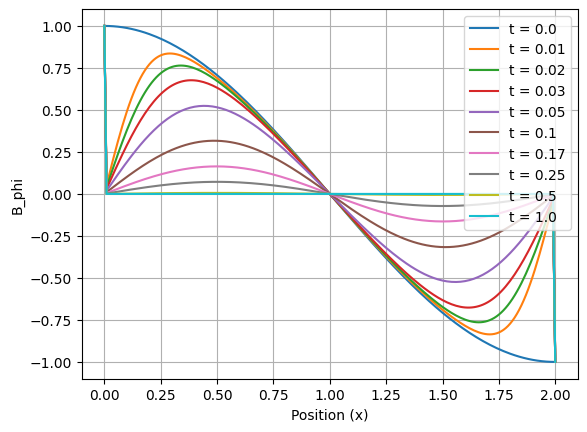

In [50]:
a0 = 0
bo = 2
xpoints = 200
ti = 0
tf = 1
tponts = 3000

# Calculate spatial and time step sizes
xstep = (bo - a0) / xpoints
tstep = (tf - ti) / tponts
# Calculate alpha value
alpha = tstep / (xstep ** 2)

#print("alpha =", round(alpha, 4))
def g_t01(t):
    return 1-(t*1/tponts)

def g_t1(t):
    return -1+(t*1/tponts)

# def g1(x):
#     return 6*np.sin((np.pi)*x/2)+np.sin(np.pi*x*3)
def g2(x):
    return np.cos((np.pi)*x/2)

# def g3(x):
#     return 8*np.sin((np.pi)*x/6)+np.sin(np.pi*x*3)

# def g_t03(t):
#     return 0

# def g_t3(t):
#     return 8*np.sin((np.pi)*2/6)+np.sin(np.pi*2*3)








# Iterate over different time points

time_points = [0, 30, 50, 80,150, 300, 500,750,1500,3000]


# plt.title(r'$6\sin\left(\frac{\pi x}{2}\right) + \sin\left(\pi x \times 3\right)$')
#plot_crank_nicolson(g1, g_t01, g_t1, a0, bo, ti,tf, xpoints,tponts, time_points)

plot_crank_nicolson(g2, g_t01, g_t1, a0, bo, ti,tf, xpoints,tponts, time_points)

#lot_crank_nicolson(g3, g_t03, g_t3, a0, bo, ti,tf, xpoints,tponts, time_points)

#plot_crank_nicolson(g4,g_t04, g_t4, a0, bo, ti,tf, xpoints,tponts, time_points )


[0.7853981633917327, 0.785398163391562, 0.7853981633910402, 0.7853981633901387, 0.7853981633888082, 0.7853981633869762, 0.7853981633845439, 0.7853981633813806, 0.7853981633773177, 0.7853981633721409, 0.7853981633655792, 0.7853981633572927, 0.7853981633468565, 0.7853981633337409, 0.7853981633172872, 0.7853981632966782, 0.785398163270901, 0.7853981632387027, 0.7853981631985358, 0.7853981631484916, 0.7853981630862177, 0.7853981630088206, 0.7853981629127451, 0.7853981627936285, 0.7853981626461235, 0.7853981624636854, 0.7853981622383139, 0.7853981619602424, 0.7853981616175612, 0.7853981611957684, 0.7853981606772271, 0.7853981600405149, 0.7853981592596455, 0.7853981583031365, 0.7853981571328954, 0.7853981557028917, 0.7853981539575744, 0.7853981518299878, 0.7853981492395354, 0.7853981460893255, 0.7853981422630264, 0.7853981376211471, 0.7853981319966417, 0.7853981251897264, 0.7853981169617719, 0.7853981070281195, 0.7853980950496438, 0.7853980806228542, 0.785398063268304, 0.7853980424170313, 0.

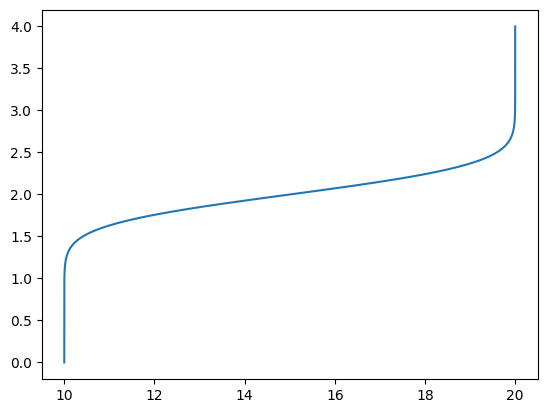

In [61]:
Tu=10
Tl=20
Lc=4
Lu=0
lamda=2
c=4174000
#c=2104000
t=0
l=0.01

Nz=int((Lc-Lu)/l)
print(Nz)
z = np.linspace(Lu, Lc, Nz+1)
print(z.shape)

400
(401,)


In [8]:
f=[1,3,4,2]
print(np.array(f)*2)
print(np.array(f)*2+1)

[2 6 8 4]
[3 7 9 5]
